# Proyek Akhir : Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Alya Nur Aini
- Email: alyanuraini1409@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

### Menyiapkan data yang akan digunakan

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
df = pd.read_csv(url, sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Deskripsi Variabel

In [3]:
# Informasi umum pada df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Data Student performance memiliki 4424 data dan 37 kolom

In [4]:
# analisis statistik
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### Identifikasi Missing Value dan Duplikat

In [5]:
# Cek apakah ada baris duplikat
duplicates = df[df.duplicated()]

# Tampilkan jumlah dan isi duplikat
print(f"Jumlah baris duplikat: {len(duplicates)}")
display(duplicates)

Jumlah baris duplikat: 0


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status


In [6]:
# Cek jumlah missing values per kolom
missing_data = df.isnull().sum()

# Tampilkan hanya kolom yang memiliki missing values
missing_data = missing_data[missing_data > 0]

# Tampilkan hasil
print("Jumlah missing values per kolom:")
print(missing_data)

Jumlah missing values per kolom:
Series([], dtype: int64)


### Univariate Analysis

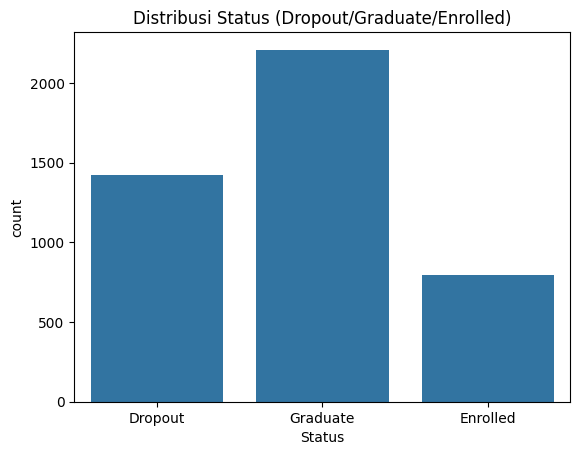

In [7]:

# menampilkan informasi mengenai Distribusi status
sns.countplot(data=df, x='Status')
plt.title('Distribusi Status (Dropout/Graduate/Enrolled)')
plt.show()


Berdasarkan visualisasi di atas menunjukkan perbandingan jumlah siswa yang keluar, lulus dan masih menempuh kuliah, yang dimana jumlah siswa yang keluar hampir di angka 1500 orang, yang lulus di atas 2000 orang dan yang masih menempuh pendidikan sekitar 700 orang.



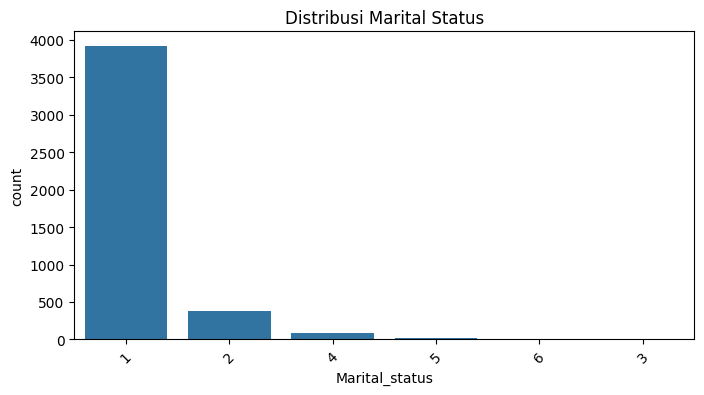

In [8]:
# menampilkan informasi mengenai marital stsatus
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Marital_status', order=df['Marital_status'].value_counts().index)
plt.title('Distribusi Marital Status')
plt.xticks(rotation=45)
plt.show()


Berdasarkan viusalisasi berikut, staus pernikahan yang paling banyak terdapat siswa pada siswa adalah kategori pertama yaitu **Single**.

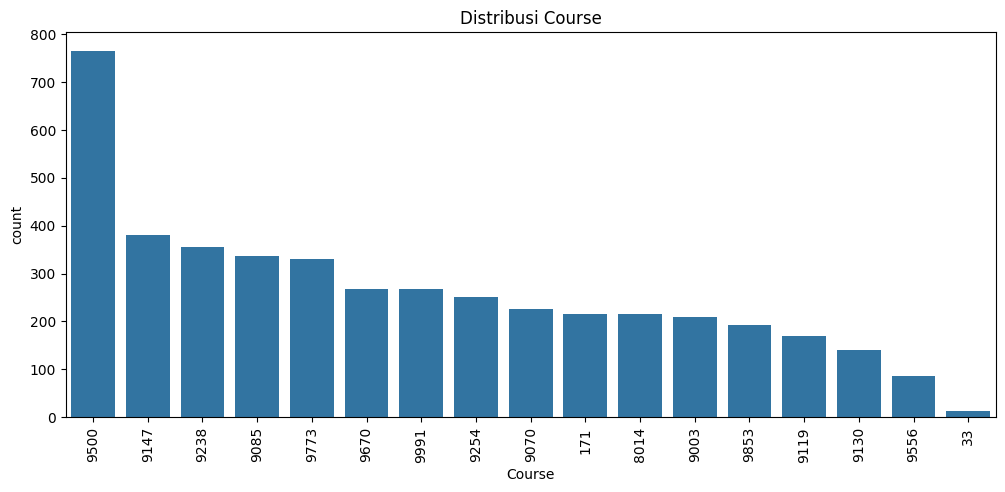

In [9]:
# menampilkan informasi mengenai course
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Course', order=df['Course'].value_counts().index)
plt.title('Distribusi Course')
plt.xticks(rotation=90)
plt.show()

Berdasarkan visualisasi berikut, menunjukkan siswa lebih banyak mengambil course dengan kode 9500 yaitu nursing.

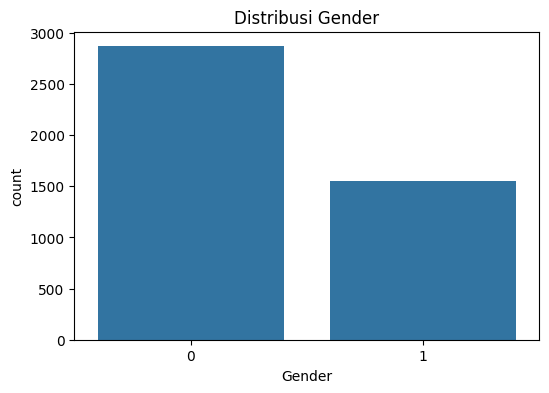

In [10]:
# menampilkan informasi mengenai Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title('Distribusi Gender')
plt.show()

siswa pada institusi banyaknya adalah siswa **Perempuan**.

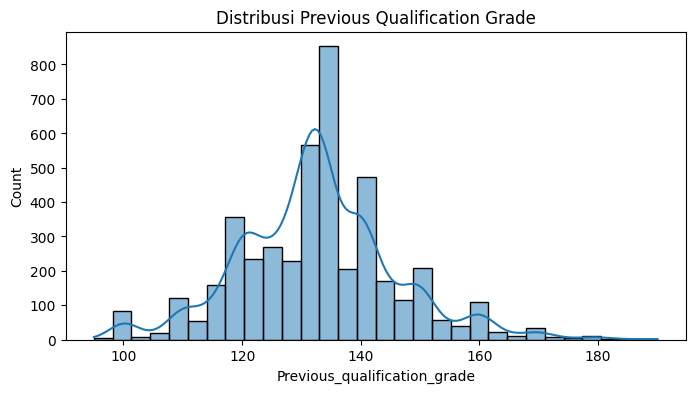

In [11]:
# menampilkan informasi mengenai Previous Qualification Grade
plt.figure(figsize=(8, 4))
sns.histplot(df['Previous_qualification_grade'], bins=30, kde=True)
plt.title('Distribusi Previous Qualification Grade')
plt.xlabel('Previous_qualification_grade')
plt.show()


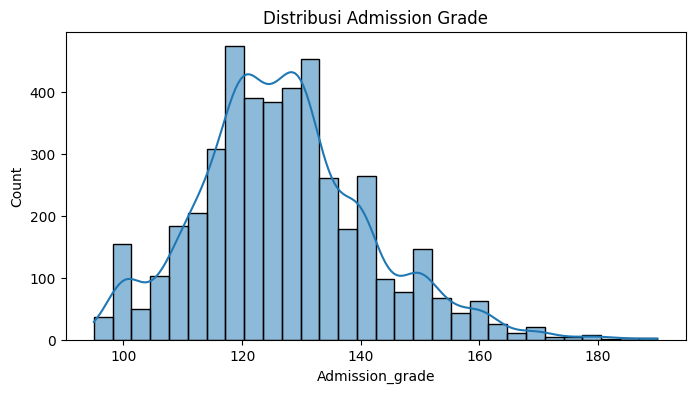

In [12]:
# menampilkan informasi mengenai Admission Grade
plt.figure(figsize=(8, 4))
sns.histplot(df['Admission_grade'], bins=30, kde=True)
plt.title('Distribusi Admission Grade')
plt.xlabel('Admission_grade')
plt.show()


Berdasarkan nilai kualifikasi sebelumnya dan nilai admission pada siswa menunjukkan bahwa siswa mayoritas memiliki nilai di rentang 120 hingga 140.

### Multivariate Analysis

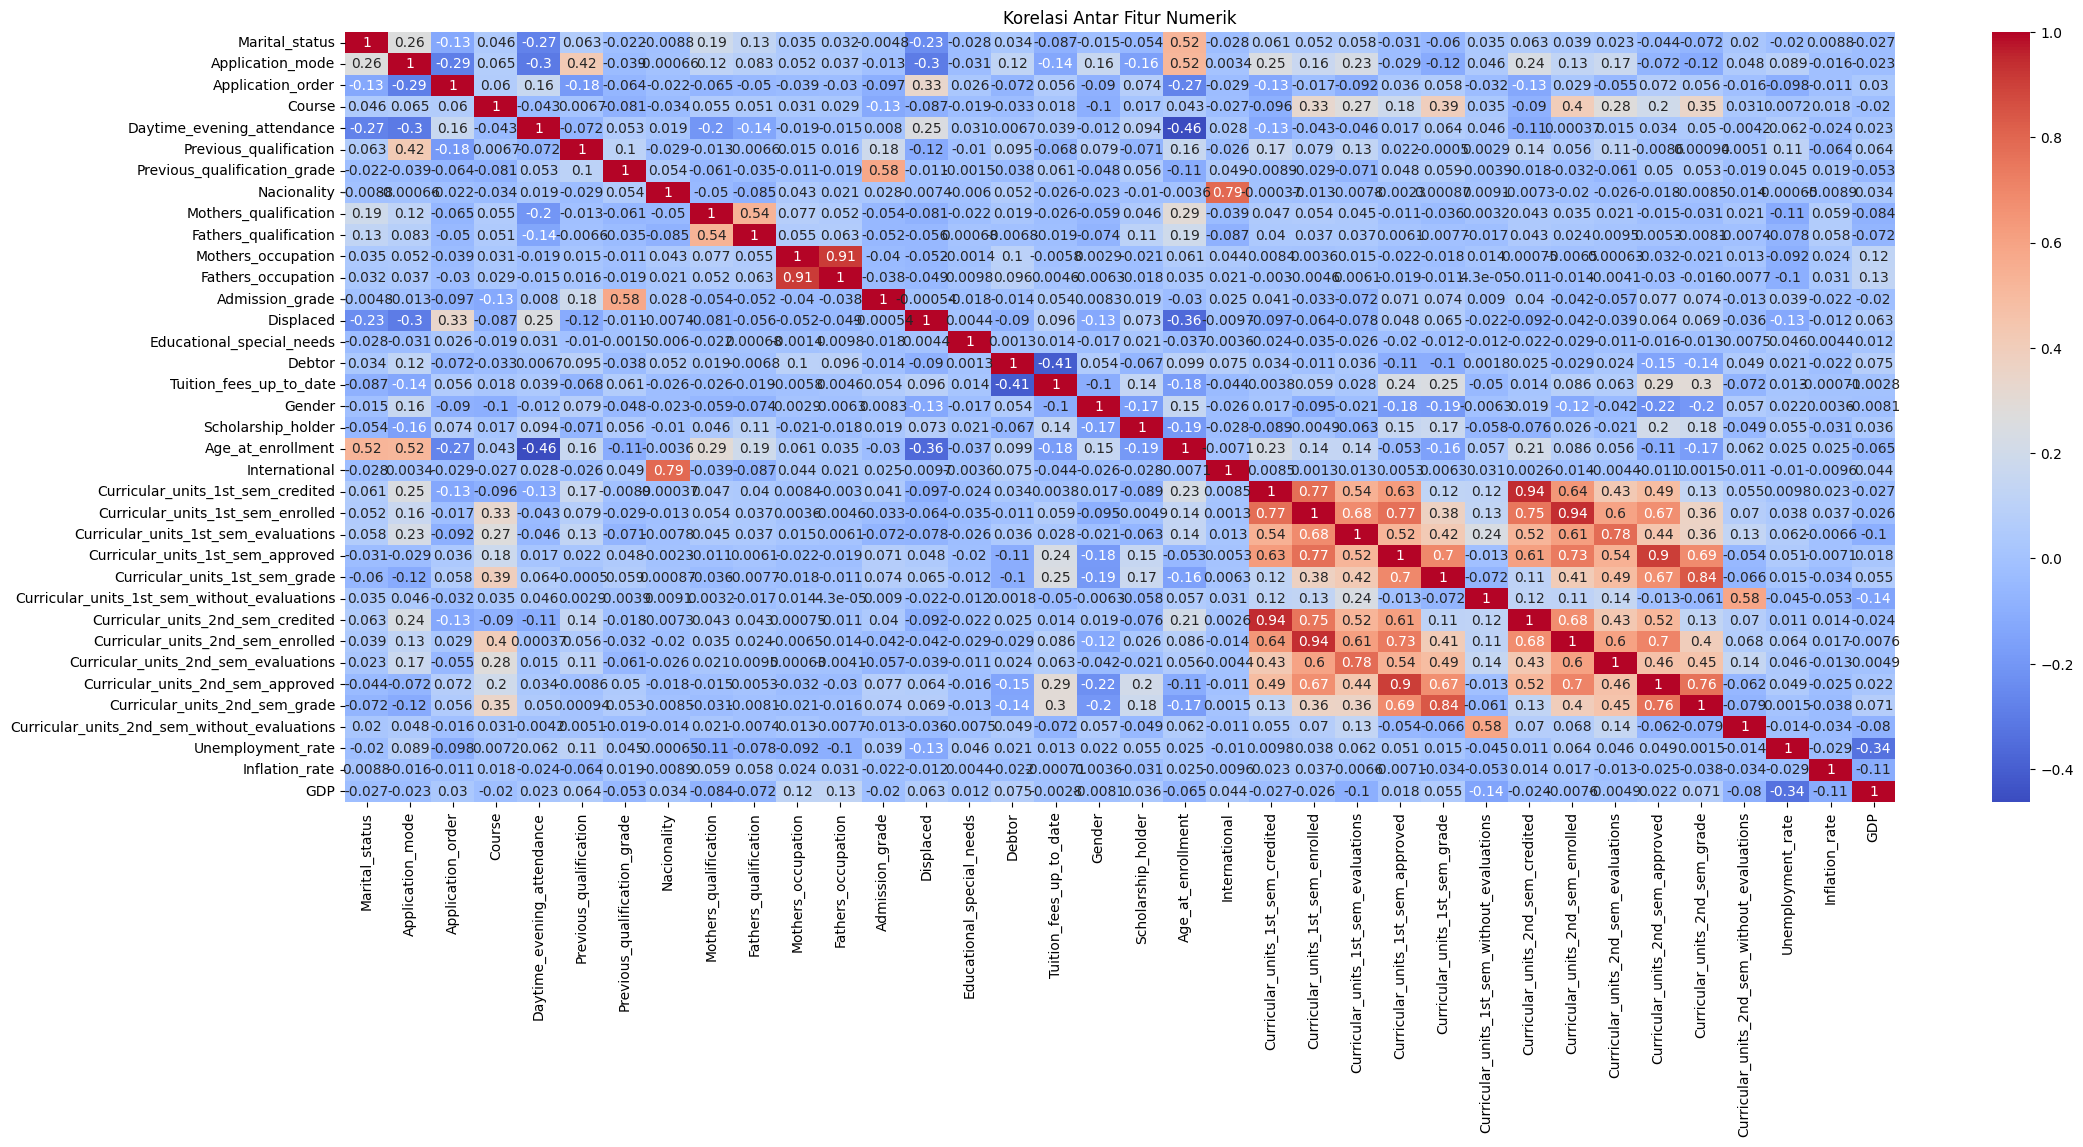

In [13]:
# menampilkan informasi mengenai Korelasi numerik
plt.figure(figsize=(25, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()


Berdasarkan visualisasi matriks korelasi pada data student performance, terlihat bahwa terdapat korelasi yang cukup tinggi antara fitur-fitur akademik seperti Curricular_units_1st_sem_grade, Curricular_units_1st_sem_approved, dan Curricular_units_2nd_sem_grade, menunjukkan bahwa performa siswa di semester awal saling berkaitan erat dan cenderung konsisten. Sementara itu, fitur Age_at_enrollment menunjukkan korelasi negatif terhadap Admission_grade dan performa akademik, mengindikasikan bahwa usia yang lebih tua saat masuk mungkin berpengaruh terhadap performa yang lebih rendah. Fitur ekonomi dan administratif seperti Debtor, Scholarship_holder, dan Tuition_fees_up_to_date tidak menunjukkan korelasi kuat dengan fitur lain, namun bisa memiliki pengaruh penting dalam prediksi status siswa secara non-linear. Selain itu, fitur seperti Displaced, International, dan Educational_special_needs juga tampak tidak berkorelasi kuat dengan variabel lain, yang bisa menjadi indikator penting dalam membedakan kelompok siswa secara spesifik.

## Data Preparation / Preprocessing

### Konversi tipe data

In [14]:
# Ubah semua kolom bertipe object menjadi category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')


# Cek hasil perubahan tipe data
print(df.dtypes)


Marital_status                                     int64
Application_mode                                   int64
Application_order                                  int64
Course                                             int64
Daytime_evening_attendance                         int64
Previous_qualification                             int64
Previous_qualification_grade                     float64
Nacionality                                        int64
Mothers_qualification                              int64
Fathers_qualification                              int64
Mothers_occupation                                 int64
Fathers_occupation                                 int64
Admission_grade                                  float64
Displaced                                          int64
Educational_special_needs                          int64
Debtor                                             int64
Tuition_fees_up_to_date                            int64
Gender                         

### data transformation

In [15]:
# Membuat fungsi untuk mengubah text menjadi map directory
def parse_to_dict(raw_text):
    result = {}
    lines = raw_text.strip().split('\n')
    for line in lines:
        parts = line.split(' - ', 1)
        if len(parts) == 2:
            key, value = parts
            try:
                result[int(key.strip())] = value.strip()
            except ValueError:
                continue
    return result

# Contoh:
marital_status_text = """
1 - Single
2 - Married
3 - Widowed
4 - Divorced
5 - Facto Union
6 - Legally Separated
"""
application_mode_text = """
1 - 1st phase general contingent
2 - Ordinance No. 612/93
5 - 1st phase special contingent (Azores Island)
7 - Holders of other higher courses
10 - Ordinance No. 854B/99
15 - International student (bachelor)
16 - 1st phase special contingent (Madeira Island)
17 - 2nd phase general contingent
18 - 3rd phase general contingent
26 - Ordinance No. 533A/99, item b2) (Different Plan)
27 - Ordinance No. 533A/99, item b3 (Other Institution)
39 - Over 23 years old
42 - Transfer
43 - Change of course
44 - Technological specialization diploma holders
51 - Change of institution/course
53 - Short cycle diploma holders
57 - Change of institution/course (International)
"""
course_text="""
33 - Biofuel Production Technologies
171 - Animation and Multimedia Design
8014 - Social Service (evening attendance)
9003 - Agronomy
9070 - Communication Design
9085 - Veterinary Nursing
9119 - Informatics Engineering
9130 - Equinculture
9147 - Management
9238 - Social Service
9254 - Tourism
9500 - Nursing
9556 - Oral Hygiene
9670 - Advertising and Marketing Management
9773 - Journalism and Communication
9853 - Basic Education
9991 - Management (evening attendance)
"""
previous_qualification_text = """
1 - Secondary education
2 - Higher education bachelor's degree
3 - Higher education degree
4 - Higher education master's
5 - Higher education doctorate
6 - Frequency of higher education
9 - 12th year of schooling not completed
10 - 11th year of schooling not completed
12 - Other 11th year of schooling
14 - 10th year of schooling
15 - 10th year of schooling not completed
19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
39 - Technological specialization course
40 - Higher education degree (1st cycle)
42 - Professional higher technical course
43 - Higher education master (2nd cycle)
"""
nacionality_text = """
1 - Portuguese
2 - German
6 - Spanish
11 - Italian
13 - Dutch
14 - English
17 - Lithuanian
21 - Angolan
22 - Cape Verdean
24 - Guinean
25 - Mozambican
26 - Santomean
32 - Turkish
41 - Brazilian
62 - Romanian
100 - Moldova (Republic of)
101 - Mexican
103 - Ukrainian
105 - Russian
108 - Cuban
109 - Colombian
"""
parents_qualification_text = """
1 - Secondary Education 12th Year of Schooling or Eq.
2 - Higher Education Bachelor's Degree
3 - Higher Education Degree
4 - Higher Education Master's
5 - Higher Education Doctorate
6 - Frequency of Higher Education
9 - 12th Year of Schooling Not Completed
10 - 11th Year of Schooling Not Completed
11 - 7th Year (Old)
12 - Other 11th Year of Schooling
14 - 10th Year of Schooling
18 - General commerce course
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
22 - Technical professional course
26 - 7th year of schooling
27 - 2nd cycle of the general high school course
29 - 9th Year of Schooling Not Completed
30 - 8th year of schooling
34 - Unknown
35 - Can't read or write
36 - Can read without having a 4th year of schooling
37 - Basic education 1st cycle (4th/5th year) or equiv.
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
39 - Technological specialization course
40 - Higher education degree (1st cycle)
41 - Specialized higher studies course
42 - Professional higher technical course
43 - Higher Education Master (2nd cycle)
44 - Higher Education Doctorate (3rd cycle)
"""
mother_occupation_text = """
0 - Student
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
2 - Specialists in Intellectual and Scientific Activities
3 - Intermediate Level Technicians and Professions
4 - Administrative staff
5 - Personal Services, Security and Safety Workers and Sellers
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
7 - Skilled Workers in Industry, Construction and Craftsmen
8 - Installation and Machine Operators and Assembly Workers
9 - Unskilled Workers
10 - Armed Forces Professions
90 - Other Situation
99 - (blank)
122 - Health professionals
123 - teachers
125 - Specialists in information and communication technologies (ICT)
131 - Intermediate level science and engineering technicians and professions
132 - Technicians and professionals, of intermediate level of health
134 - Intermediate level technicians from legal, social, sports, cultural and similar services
141 - Office workers, secretaries in general and data processing operators
143 - Data, accounting, statistical, financial services and registry-related operators
144 - Other administrative support staff
151 - personal service workers
152 - sellers
153 - Personal care workers and the like
171 - Skilled construction workers and the like, except electricians
173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
175 - Workers in food processing, woodworking, clothing and other industries and crafts
191 - cleaning workers
192 - Unskilled workers in agriculture, animal production, fisheries and forestry
193 - Unskilled workers in extractive industry, construction, manufacturing and transport
194 - Meal preparation assistants
"""
father_occupation_text ="""
0 - Student
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
2 - Specialists in Intellectual and Scientific Activities
3 - Intermediate Level Technicians and Professions
4 - Administrative staff
5 - Personal Services, Security and Safety Workers and Sellers
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
7 - Skilled Workers in Industry, Construction and Craftsmen
8 - Installation and Machine Operators and Assembly Workers
9 - Unskilled Workers
10 - Armed Forces Professions
90 - Other Situation
99 - (blank)
101 - Armed Forces Officers
102 - Armed Forces Sergeants
103 - Other Armed Forces personnel
112 - Directors of administrative and commercial services
114 - Hotel, catering, trade and other services directors
121 - Specialists in the physical sciences, mathematics, engineering and related techniques
122 - Health professionals
123 - teachers
124 - Specialists in finance, accounting, administrative organization, public and commercial relations
131 - Intermediate level science and engineering technicians and professions
132 - Technicians and professionals, of intermediate level of health
134 - Intermediate level technicians from legal, social, sports, cultural and similar services
135 - Information and communication technology technicians
141 - Office workers, secretaries in general and data processing operators
143 - Data, accounting, statistical, financial services and registry-related operators
144 - Other administrative support staff
151 - personal service workers
152 - sellers
153 - Personal care workers and the like
154 - Protection and security services personnel
161 - Market-oriented farmers and skilled agricultural and animal production workers
163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
171 - Skilled construction workers and the like, except electricians
172 - Skilled workers in metallurgy, metalworking and similar
174 - Skilled workers in electricity and electronics
175 - Workers in food processing, woodworking, clothing and other industries and crafts
181 - Fixed plant and machine operators
182 - assembly workers
183 - Vehicle drivers and mobile equipment operators
192 - Unskilled workers in agriculture, animal production, fisheries and forestry
193 - Unskilled workers in extractive industry, construction, manufacturing and transport
194 - Meal preparation assistants
195 - Street vendors (except food) and street service providers
"""
yes_no_Text = """
1 - yes
0 - no
"""

gender_text = """
1 - Male
0 - Female
"""
attendance_text = """
1 - daytime
0 - evening
"""
# Parse text raw menjadi directory
marital_status_map = parse_to_dict(marital_status_text)
application_mode_map = parse_to_dict(application_mode_text)
course_map = parse_to_dict(course_text)
previous_qualification_map = parse_to_dict(previous_qualification_text)
nacionality_map = parse_to_dict(nacionality_text)
parents_qualification_map = parse_to_dict(parents_qualification_text)
mother_occupation_map = parse_to_dict(mother_occupation_text)
father_occupation_map = parse_to_dict(father_occupation_text)
yes_no_map = parse_to_dict(yes_no_Text)
gender_map = parse_to_dict(gender_text)
attendance_map = parse_to_dict(attendance_text)

In [16]:
print(attendance_map)

{1: 'daytime', 0: 'evening'}


In [17]:

# Terapkan mapping ke dataframe
df['Marital_status'] = df['Marital_status'].map(marital_status_map)
df['Application_mode'] = df['Application_mode'].map(application_mode_map)
df['Course'] = df['Course'].map(course_map)
df['Nacionality'] = df['Nacionality'].map(nacionality_map)
df['Mothers_qualification'] = df['Mothers_qualification'].map(parents_qualification_map)
df['Fathers_qualification'] = df['Fathers_qualification'].map(parents_qualification_map)
df['Mothers_occupation'] = df['Mothers_occupation'].map(mother_occupation_map)
df['Fathers_occupation'] = df['Fathers_occupation'].map(father_occupation_map)
df['Previous_qualification'] = df['Previous_qualification'].map(previous_qualification_map)
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(attendance_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Displaced'] = df['Displaced'].map(yes_no_map)
df['Scholarship_holder'] = df['Scholarship_holder'].map(yes_no_map)
df['Debtor'] = df['Debtor'].map(yes_no_map)
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(yes_no_map)
df['International'] = df['International'].map(yes_no_map)
df['Educational_special_needs'] = df['Educational_special_needs'].map(yes_no_map)

# Lihat hasil
df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education 12th Year of Schooling or Eq.,Higher Education Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data Splitting

In [18]:
# Ambil kolom yang akan digunakan untuk model menggunakan iloc: 0–20 dan 33–36
new_cleaned_df = df.iloc[:, list(range(0, 21)) + list(range(33, 37))].copy()

# Hasil new_cleaned
new_cleaned_df.info()

new_cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Marital_status                4424 non-null   object  
 1   Application_mode              4424 non-null   object  
 2   Application_order             4424 non-null   int64   
 3   Course                        4424 non-null   object  
 4   Daytime_evening_attendance    4424 non-null   object  
 5   Previous_qualification        4424 non-null   object  
 6   Previous_qualification_grade  4424 non-null   float64 
 7   Nacionality                   4424 non-null   object  
 8   Mothers_qualification         4424 non-null   object  
 9   Fathers_qualification         4419 non-null   object  
 10  Mothers_occupation            4424 non-null   object  
 11  Fathers_occupation            4424 non-null   object  
 12  Admission_grade               4424 non-null   fl

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other 11th Year of Schooling,...,no,yes,Male,no,20,no,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education 12th Year of Schooling or Eq.,Higher Education Degree,...,no,no,Male,no,19,no,13.9,-0.3,0.79,Graduate
2,Single,1st phase general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,no,no,Male,no,19,no,10.8,1.4,1.74,Dropout
3,Single,2nd phase general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,no,yes,Female,no,20,no,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,no,yes,Female,no,45,no,13.9,-0.3,0.79,Graduate


In [19]:
# Membagi data menjadi train dan test

train_df, test_df = train_test_split(new_cleaned_df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Menampilkan shape data train dan test
print(train_df.shape)
print(test_df.shape)

(4202, 25)
(222, 25)


### Oversampling

In [20]:
# Menampilkan jumlah data per label
train_df.Status.value_counts()

,count
Status,
Graduate,2101
Dropout,1349
Enrolled,752


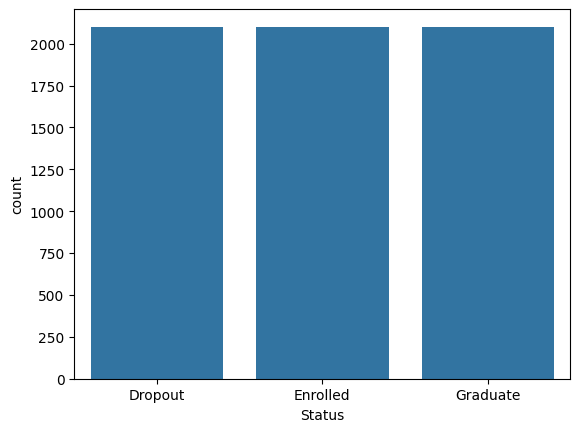

In [21]:
# Melakukan oversampling pada data train

df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]


df_majority_2_undersampled = resample(df_majority_2, n_samples=2101, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=2101, random_state=42)

oversampled_train_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)

sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

### Encoding dan Scaling


In [22]:
# Memisahkan target dengan fitur
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [23]:

# Buat folder model jika belum ada
os.makedirs("model", exist_ok=True)

#Membuat fungsi untuk scaling
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

#membuat fungsi untuk encoding
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(pd.concat([df[feature], df_test[feature]]))
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(pd.concat([df[feature], df_test[feature]]))
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [24]:
# List kolom numerik
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

# list kolomkategorikal
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Previous_qualification',
    'Daytime_evening_attendance',
    'Gender',
    'Displaced',
    'Scholarship_holder',
    'Debtor',
    'Tuition_fees_up_to_date',
    'International',
    'Educational_special_needs'
]

# Menerapkan fungsi scaling dan encoding pada kolom
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [25]:
# Melakukan encoding pada data train dan test target
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

## Modeling

In [26]:
# Menentukan parameter terbaik untuk model

rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(new_train_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [27]:
# Menampilkan hasil parameter yang terbaik
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [28]:
# Membuat model untuk prediksi
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(new_train_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Evaluation

In [29]:

# Membuat fungsi untuk evaluasi
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Dropout', 'Enrolled']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

              precision    recall  f1-score   support

     Dropout       0.67      0.58      0.62        72
    Enrolled       0.32      0.50      0.39        42
    Graduate       0.76      0.66      0.71       108

    accuracy                           0.60       222
   macro avg       0.58      0.58      0.57       222
weighted avg       0.65      0.60      0.62       222



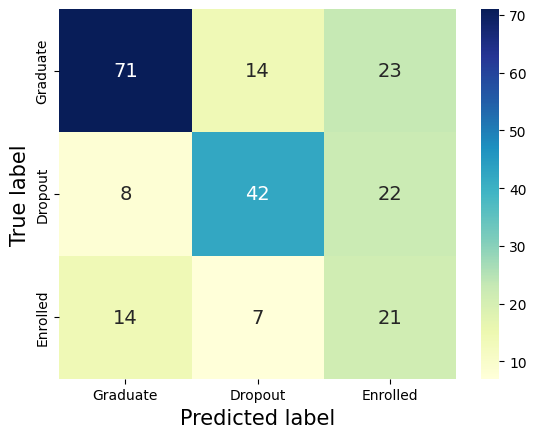

,Graduate,Dropout,Enrolled
Graduate,71,14,23
Dropout,8,42,22
Enrolled,14,7,21


In [30]:
# Melakukan prediksi menggunakan model
y_pred_test = rdf_model.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

# Mengevaluasi hasil prediksi
evaluating(y_pred=y_pred_test, y_true=y_test)

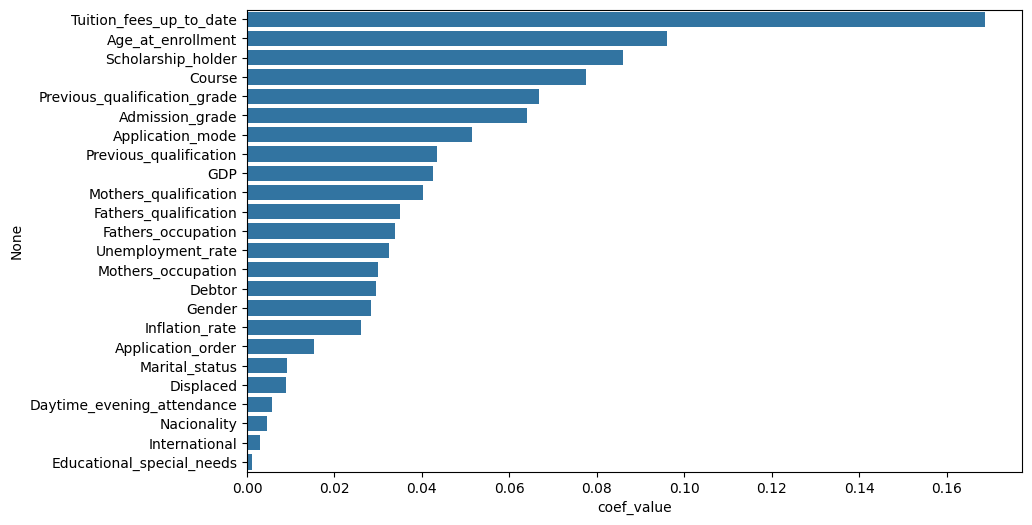

,coef_value
Tuition_fees_up_to_date,0.168814
Age_at_enrollment,0.096110
Scholarship_holder,0.085946
Course,0.077506
Previous_qualification_grade,0.066682
Admission_grade,0.064095
Application_mode,0.051436
Previous_qualification,0.043430
GDP,0.042512
Mothers_qualification,0.040283


In [31]:
# membuat fungsi untuk menampilkan feature utama saja yang digunakan pada model ini
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(rdf_model.feature_importances_, new_train_df.columns)

In [32]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

In [33]:
!zip -r model.zip model/

  adding: model/ (stored 0%)
  adding: model/rdf_model.joblib (deflated 73%)
  adding: model/encoder_Course.joblib (deflated 39%)
  adding: model/scaler_GDP.joblib (deflated 38%)
  adding: model/encoder_Mothers_qualification.joblib (deflated 51%)
  adding: model/scaler_Admission_grade.joblib (deflated 41%)
  adding: model/encoder_International.joblib (deflated 35%)
  adding: model/encoder_Application_mode.joblib (deflated 45%)
  adding: model/encoder_Scholarship_holder.joblib (deflated 35%)
  adding: model/encoder_Displaced.joblib (deflated 35%)
  adding: model/encoder_target.joblib (deflated 34%)
  adding: model/encoder_Fathers_qualification.joblib (deflated 51%)
  adding: model/scaler_Previous_qualification_grade.joblib (deflated 41%)
  adding: model/encoder_Educational_special_needs.joblib (deflated 35%)
  adding: model/encoder_Previous_qualification.joblib (deflated 48%)
  adding: model/scaler_Inflation_rate.joblib (deflated 40%)
  adding: model/encoder_Gender.joblib (deflated 35%)